In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [2]:
tips = sns.load_dataset("tips")

tips

# snsnin içinde load_datates metodu ile tips dataframe'ini okuttuk.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [43]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
213,13.27,2.5,Female,Yes,Sat,Dinner,2
167,31.71,4.5,Male,No,Sun,Dinner,4
136,10.33,2.0,Female,No,Thur,Lunch,2
44,30.40,5.6,Male,No,Sun,Dinner,4
29,19.65,3.0,Female,No,Sat,Dinner,2


# Data temiz bir data. Analize başlayabiliriz.

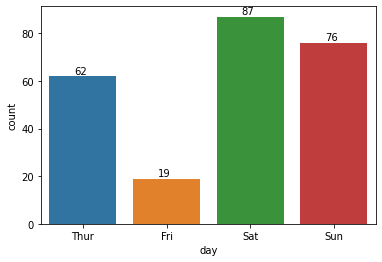

In [12]:
# biz burda countplota sadece x değeri gireceğiz!

fig, ax = plt.subplots()
ax = sns.countplot(x="day", data = tips);

# sns.countplot(x="day", data = tips, ax = ax_tip );

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));

# haftanın 4 günü için kayıt var elimizde. haftanın bu günlerine göre countplot'u yaptırdık.

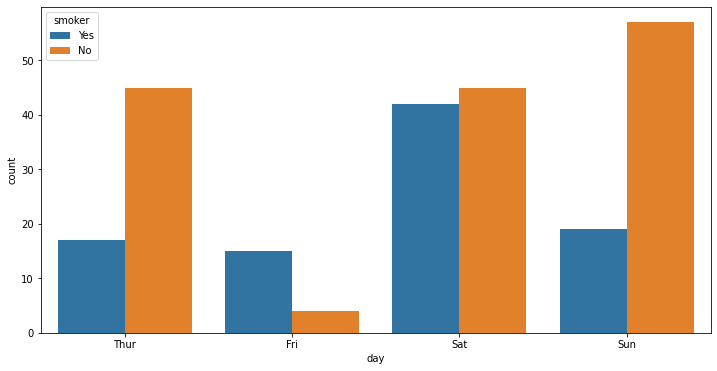

In [13]:
# HUE ekleyelim.

fig, ax_tip = plt.subplots(figsize=(12,6))

ax_tip = sns.countplot(x="day", data = tips, hue = "smoker");

# sns.countplot(x="day", data = tips, ax = ax_tip );

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
# Sigara içmeyen müşterilerin sayısı cuma günü az, diğer günlerde daha fazla

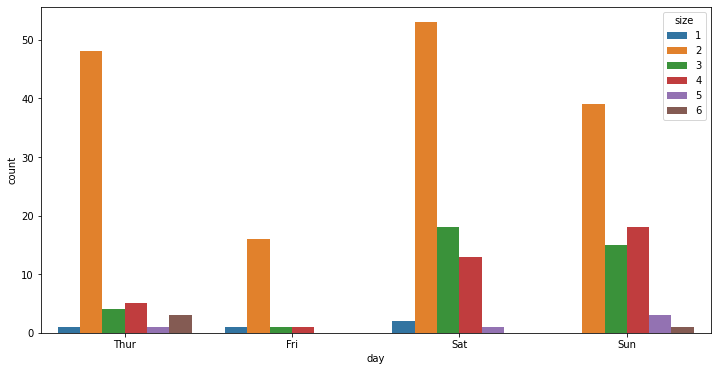

In [14]:
# HUE ekleyelim.

fig, ax_tip = plt.subplots(figsize=(12,6))

ax_tip = sns.countplot(x="day", data = tips, hue = "size");

# sns.countplot(x="day", data = tips, ax = ax_tip );

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
    
    
# hue = size girdim. size deyince kaç kişilik menu olduğunu anlıyorum. 
# dolayısıyla menülere göre günlük sayıları plotlattım.
# en çok 2 kişilik müşteri grubu geliyor.

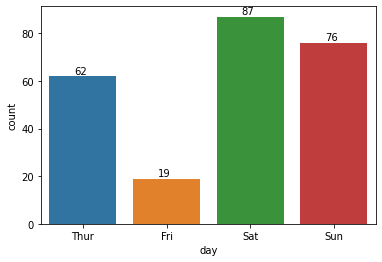

In [15]:
fig, ax_tip = plt.subplots()
ax_tip = sns.countplot(x="day", data = tips);
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
#En fazla hafta sonu hatta Cts günü müşteri geliyor
    

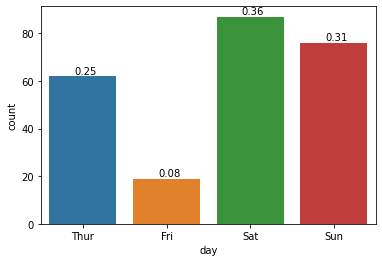

In [16]:
fig, ax_tip = plt.subplots()
ax_tip = sns.countplot(x="day", data = tips);
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate(round(p.get_height()/tips.day.count(),2), (p.get_x()+0.3, p.get_height()+1));
#Gün bazında gelen müşteri oranlarını üzerine yazdırdık   
# round(p.get_height()/tips.day.count(),2 ile virgülden sonraki basamak sayısını ayarladım.

<AxesSubplot:xlabel='sex', ylabel='tip'>

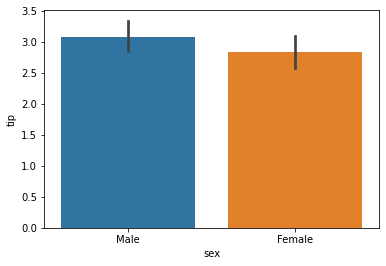

In [17]:
sns.barplot("sex", "tip", data = tips)
#Gelen müşterilerin cinsiyete göre ortalaması. Erkek müşteriler biraz daha fazla

<AxesSubplot:xlabel='sex', ylabel='tip'>

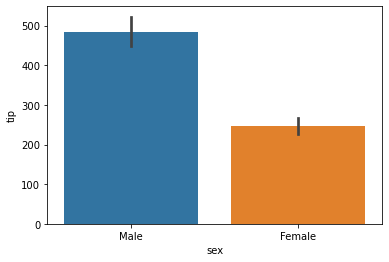

In [18]:
sns.barplot("sex", "tip", data = tips, estimator = np.sum)

# estimator'a sum aggregate fonksiyonunu girerek tip'lerin toplamını aldım.
# erkeklerin ve kadınların toplam bıraktığı bahşişi görebiliyorum
#Erkekler daha fazla bahşiş vermiş

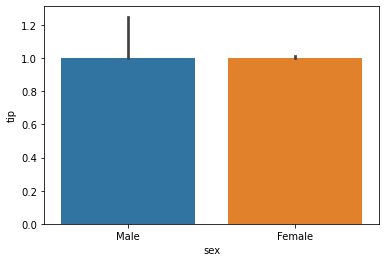

In [19]:
sns.barplot("sex", "tip", data = tips, estimator = np.min);

 # verilen minimun bahşişleri gördüm.

<AxesSubplot:xlabel='sex', ylabel='tip'>

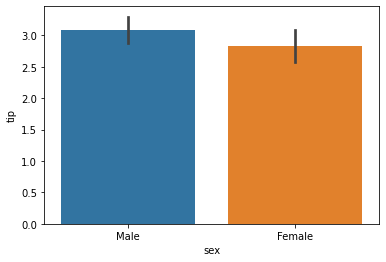

In [20]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean)

<AxesSubplot:xlabel='sex', ylabel='tip'>

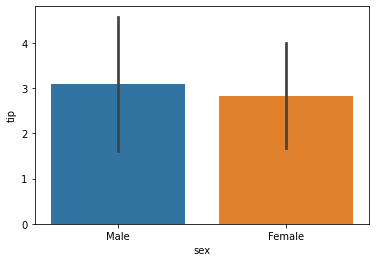

In [21]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean, ci="sd")
#Erkeklerin verdiği bahşişte dağılım daha fazla

<AxesSubplot:xlabel='sex', ylabel='tip'>

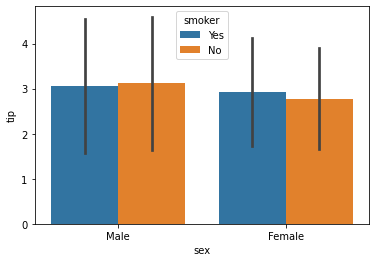

In [22]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean, ci="sd", hue = "smoker")
#Sigara içen erkek ve kadınların içmeyen kadın ve erkeklere göre ortalama verdiği bahşiş ve standart sapmaları

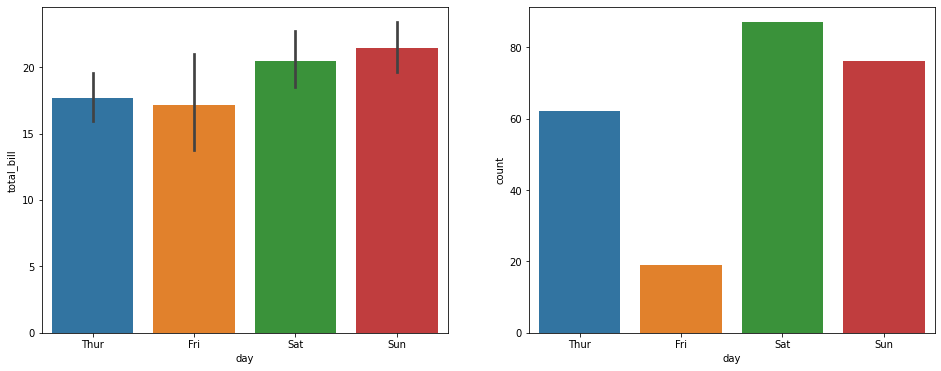

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))  # yanyana iki plot göstermek istiyorum. o yüzden 1 satır 2 süttun girdim

# her ikisinde data'm aynı
ax[0] = sns.barplot(data = tips, x = "day", y = "total_bill", ax = ax[0])  # y değeri girmezsem hata verir! 
# bu plotta ax'in ax[0] olduğunu içerde belirtmezsem hata veriyor.


ax[1] = sns.countplot(data = tips, x = "day",               ax = ax[1]) # countplotta y değeri girmiyorum.

#günlere gelen müşteri sayısı ve müşterilerin ödediği tutar ortlamlarını gösteren iki grafiği yanyana çizdirdim. Cuma günü az kişi gelmesine ragmen ödedikleri oran daha fazla. 

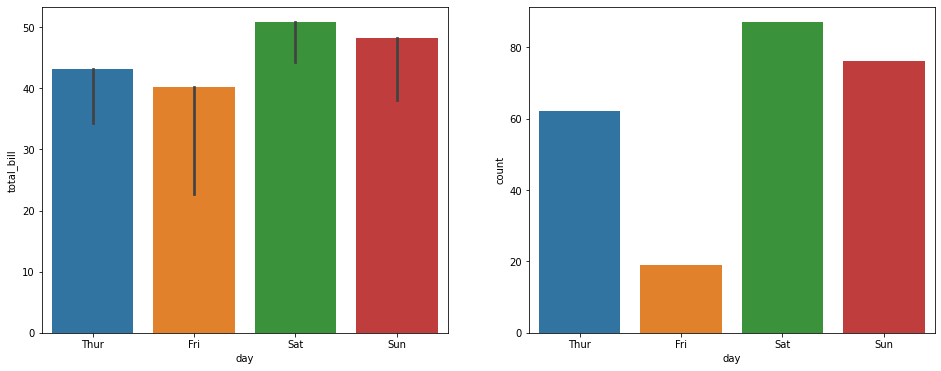

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))  # yanyana iki plot göstermek istiyorum. o yüzden 1 satır 2 süttun girdim

# her ikisinde data'm aynı
ax[0] = sns.barplot(data = tips, x = "day", y = "total_bill", ax = ax[0], estimator=np.max)  # y değeri girmezsem hata verir!


ax[1] = sns.countplot(data = tips, x = "day",               ax = ax[1]) # countplotta y değeri girmiyorum.

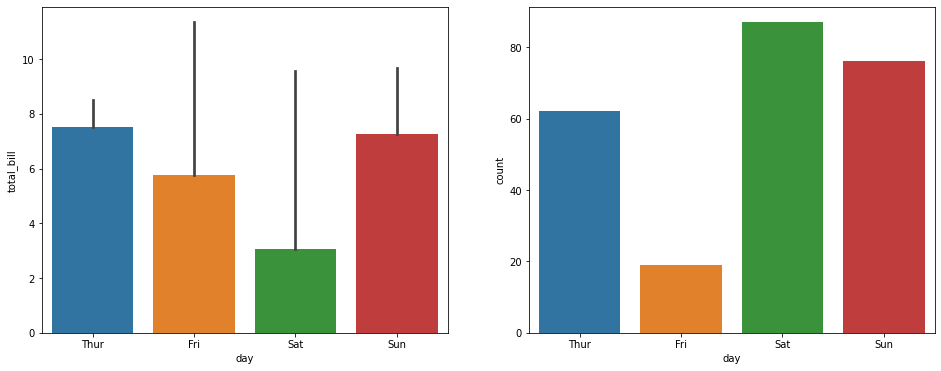

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))  # yanyana iki plot göstermek istiyorum. o yüzden 1 satır 2 süttun girdim

# her ikisinde data'm aynı
ax[0] = sns.barplot(data = tips, x = "day", y = "total_bill", ax = ax[0], estimator=np.min)  # y değeri girmezsem hata verir!


ax[1] = sns.countplot(data = tips, x = "day",               ax = ax[1]) # countplotta y değeri girmiyorum.

<AxesSubplot:xlabel='day', ylabel='tip'>

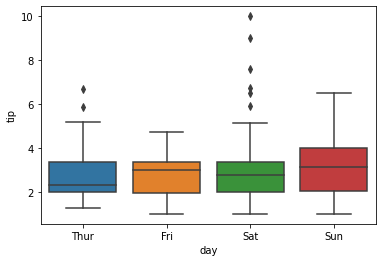

In [26]:
sns.boxplot(x="day", y="tip", data=tips)

# Cumartesinde sıradışı değerler (outlier lar) demek ki cumartesi günleri sıradışı bahşişler görebilirim.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

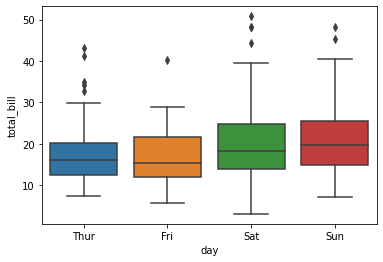

In [27]:
sns.boxplot(x="day", y="total_bill", data=tips)

# yine cumartesi günleri total_bill de normalin dışında miktarlar görebiliyorum.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

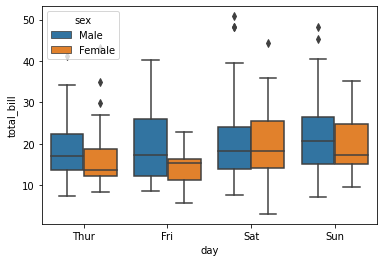

In [28]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")

<AxesSubplot:xlabel='day', ylabel='tip'>

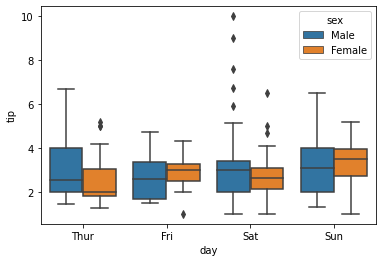

In [29]:
sns.boxplot(x="day", y="tip", data=tips, hue="sex")

<AxesSubplot:xlabel='tip', ylabel='day'>

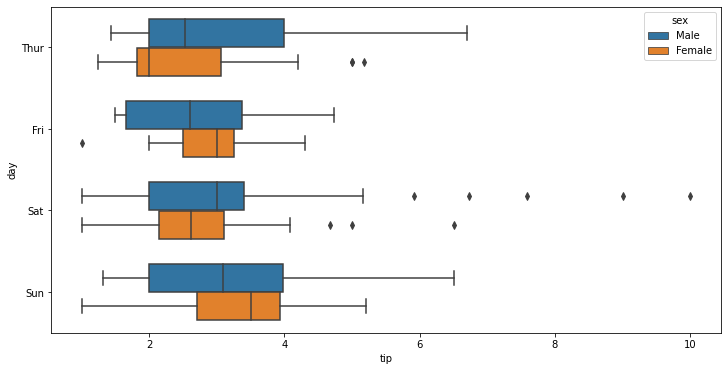

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(y="day", x="tip", data=tips, hue="sex", width=0.7)


<AxesSubplot:xlabel='tip', ylabel='smoker'>

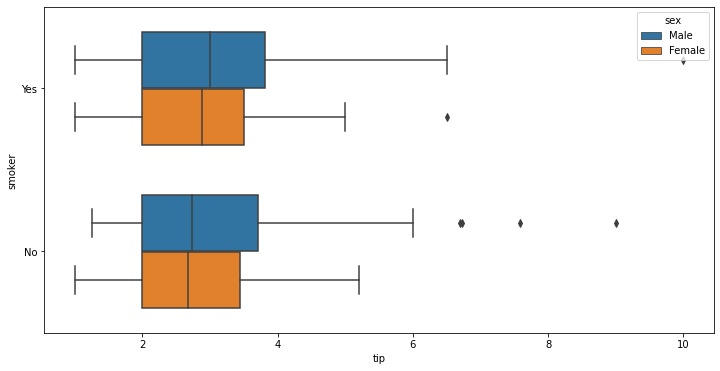

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(y="smoker", x="tip", data=tips, hue="sex", width=0.7)

# sigara içme durumu ile verilen bahşişi kıyasladım. bunu kadın-erkek olarak ayrı ayrı görüntüledim.

<AxesSubplot:xlabel='day', ylabel='tip'>

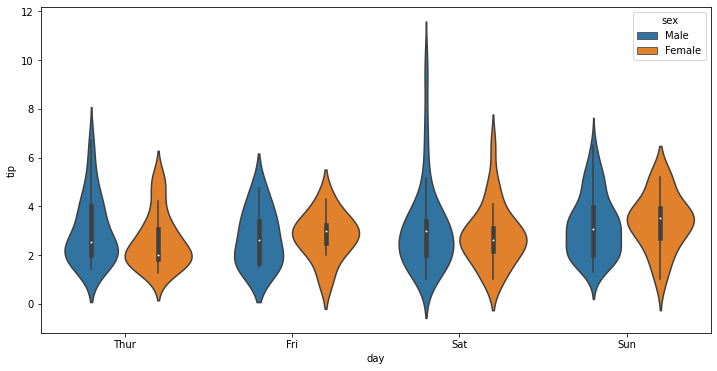

In [32]:
plt.figure(figsize=(12,6))

sns.violinplot(x="day", y="tip", data=tips, hue="sex")

# BUNA HISTOGRAMIN BOXPLOT HALİ DİYEBİLİRİM!!

# dikkat edersen bunların her biri simetrik.


<AxesSubplot:xlabel='day', ylabel='tip'>

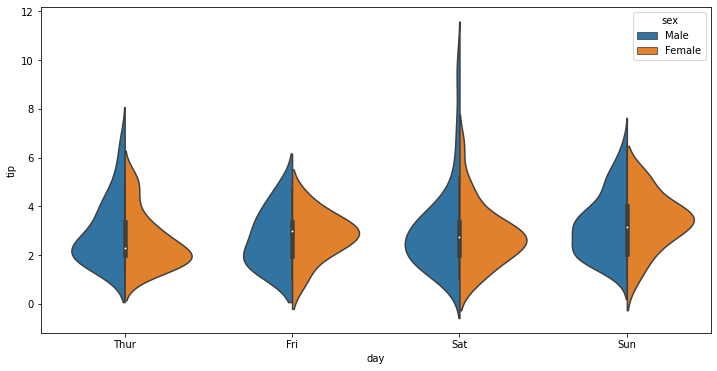

In [33]:
plt.figure(figsize=(12,6))

sns.violinplot(x="day", y="tip", data=tips, hue="sex", split=True)

# hue yaptığımız zaman 8 tane violin oldu. 
# split=True yaparak violinlerin sağını male, solunu female e ayırarak violin sayısını 4'e düşürdük.
# artık violinler simetrik değil çünkü sol ve sağ erek ve kadınları temsil ediyor.

<AxesSubplot:xlabel='tip', ylabel='day'>

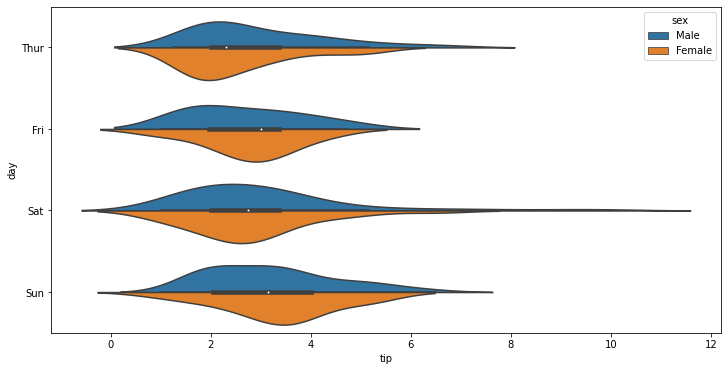

In [34]:
plt.figure(figsize=(12,6))

sns.violinplot(y="day", x="tip", data=tips, hue="sex", split=True)



<AxesSubplot:xlabel='tip', ylabel='day'>

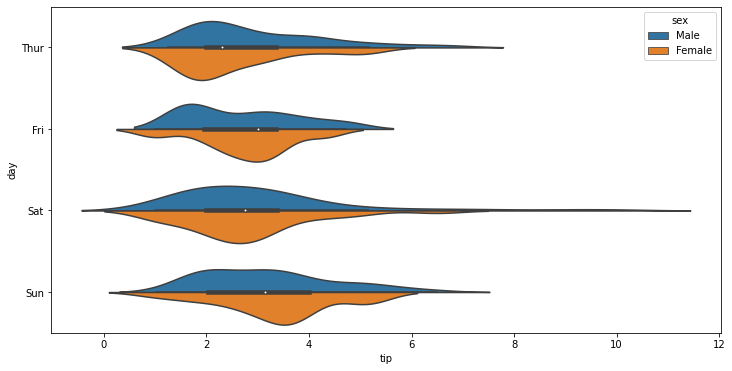

In [35]:
plt.figure(figsize=(12,6))

sns.violinplot(y="day", x="tip", data=tips, hue="sex", split=True, bw=0.4)

# bandwidth (bw) değeri giriyorum.
# bw değeriyle oynayarak detayları daha rahat görebiliyoruz.
# bw'i azalttıkça hassasiyet ayarını arttırmış oluyoruz. (bins attribute gibi ama tam tersi)

<AxesSubplot:xlabel='tip', ylabel='day'>

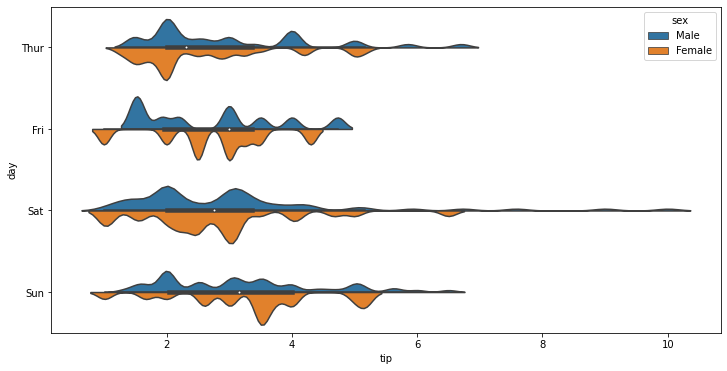

In [36]:
plt.figure(figsize=(12,6))

sns.violinplot(y="day", x="tip", data=tips, hue="sex", split=True, bw=0.1)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

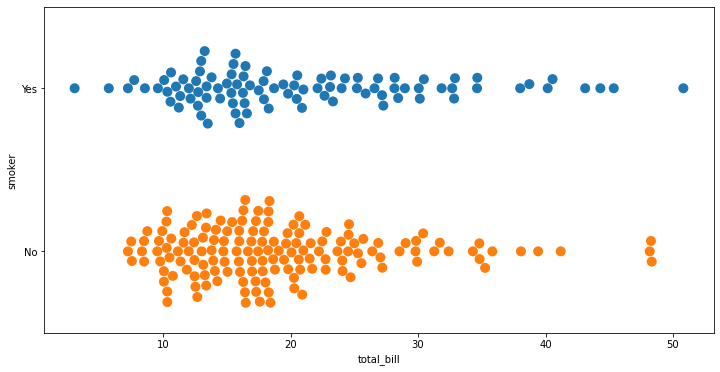

In [37]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="total_bill", data=tips, size=10, y="smoker")

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

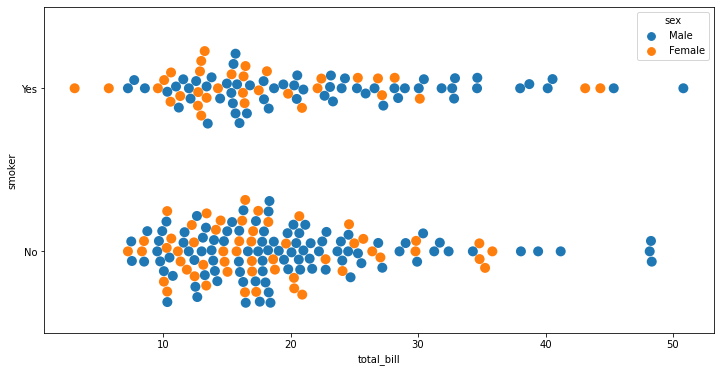

In [38]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="total_bill", data=tips, size=10, y="smoker", hue="sex")

# cinsiyete göre hue verdim.

# baktığımızda sigara içmeyenler arasında yüksek fatura ödeyenlerin çoğu erkek olduğunu görüyorum.

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

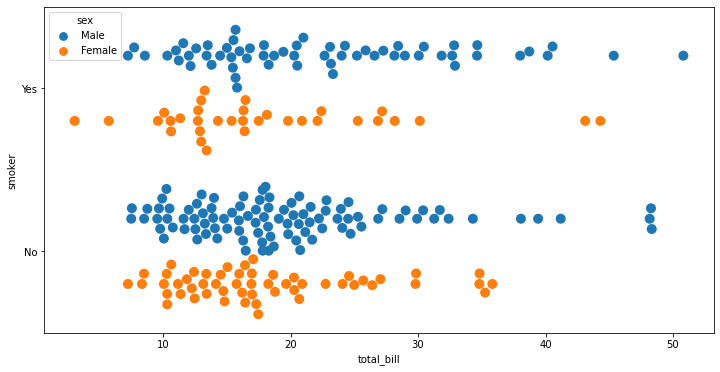

In [39]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="total_bill", data=tips, size=10, y="smoker", hue="sex", dodge=True)

# dodge=True ile kadın ve erkeklerin noktalarını birbirinden ayırarak gösterttim.